In [1]:
%matplotlib inline
from cameraViewer import *

In [2]:
olpy.read_detidlist()

('IPX-021707',
 'IPX-021708',
 'IPX-021714',
 'IPX-021713',
 'IPX-021705',
 'IPX-021712',
 'IPX-021710',
 'IPX-021706',
 'IPX-022045',
 'MPCCD-1-1-010',
 'MPCCD-1N0-M07-001',
 'OPAL-234363',
 'IPX-022183',
 'IPX-022182',
 'IPX-022160',
 'MPCCD-8-2-002-1',
 'MPCCD-8-2-002-2',
 'MPCCD-8-2-002-3',
 'MPCCD-8-2-002-4',
 'MPCCD-8-2-002-5',
 'MPCCD-8-2-002-6',
 'MPCCD-8-2-002-7',
 'MPCCD-8-2-002-8',
 'IPX-022104',
 'IPX-022135',
 'IPX-022184',
 'IPX-022231')

In [3]:
getNewestRun( 3 )

711675

In [4]:
getDetectorList( 3 , getNewestRun(3) )

('MPCCD-8-2-002',
 'MPCCD-8-2-002-1',
 'MPCCD-8-2-002-2',
 'MPCCD-8-2-002-3',
 'MPCCD-8-2-002-4',
 'MPCCD-8-2-002-5',
 'MPCCD-8-2-002-6',
 'MPCCD-8-2-002-7',
 'MPCCD-8-2-002-8')

In [5]:
tagHigh = getNewestTag( 'xfel_bl_3_tc_bm_2_pd/charge' )
tagLow = tagHigh - 100
tagRange = (tagLow, tagHigh)
tags = [ tag for tag in range(tagRange[0],tagRange[1]) ]



iMs = np.zeros((1024,512,8))

for idx in range(8):
    iMs[:,:,idx] = integratedCamera( 'MPCCD-8-2-002-'+str(idx+1) , tags  )

# print(iM.shape)

(-200050000, 'OL_ERR_TAGINVALID')
(-200050000, 'OL_ERR_TAGINVALID')
(-200050000, 'OL_ERR_TAGINVALID')
(-200050000, 'OL_ERR_TAGINVALID')
(-200050000, 'OL_ERR_TAGINVALID')
(-200050000, 'OL_ERR_TAGINVALID')
(-200050000, 'OL_ERR_TAGINVALID')
(-200050000, 'OL_ERR_TAGINVALID')
(-200050000, 'OL_ERR_TAGINVALID')
(-200050000, 'OL_ERR_TAGINVALID')
(-200050000, 'OL_ERR_TAGINVALID')
(-200050000, 'OL_ERR_TAGINVALID')
(-200050000, 'OL_ERR_TAGINVALID')
(-200050000, 'OL_ERR_TAGINVALID')
(-200050000, 'OL_ERR_TAGINVALID')
(-200050000, 'OL_ERR_TAGINVALID')
(-200050000, 'OL_ERR_TAGINVALID')
(-200050000, 'OL_ERR_TAGINVALID')
(-200050000, 'OL_ERR_TAGINVALID')
(-200050000, 'OL_ERR_TAGINVALID')
(-200050000, 'OL_ERR_TAGINVALID')
(-200050000, 'OL_ERR_TAGINVALID')
(-200050000, 'OL_ERR_TAGINVALID')
(-200050000, 'OL_ERR_TAGINVALID')
(-200050000, 'OL_ERR_TAGINVALID')
(-200050000, 'OL_ERR_TAGINVALID')
(-200050000, 'OL_ERR_TAGINVALID')
(-200050000, 'OL_ERR_TAGINVALID')
(-200050000, 'OL_ERR_TAGINVALID')
(-200050000, '

In [7]:
x = np.arange(iMs[:,:,0].shape[0])
y = np.arange(iMs[:,:,0].shape[1])

XX,YY = np.meshgrid(x,y)

None None


/home/mrware/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['serif'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


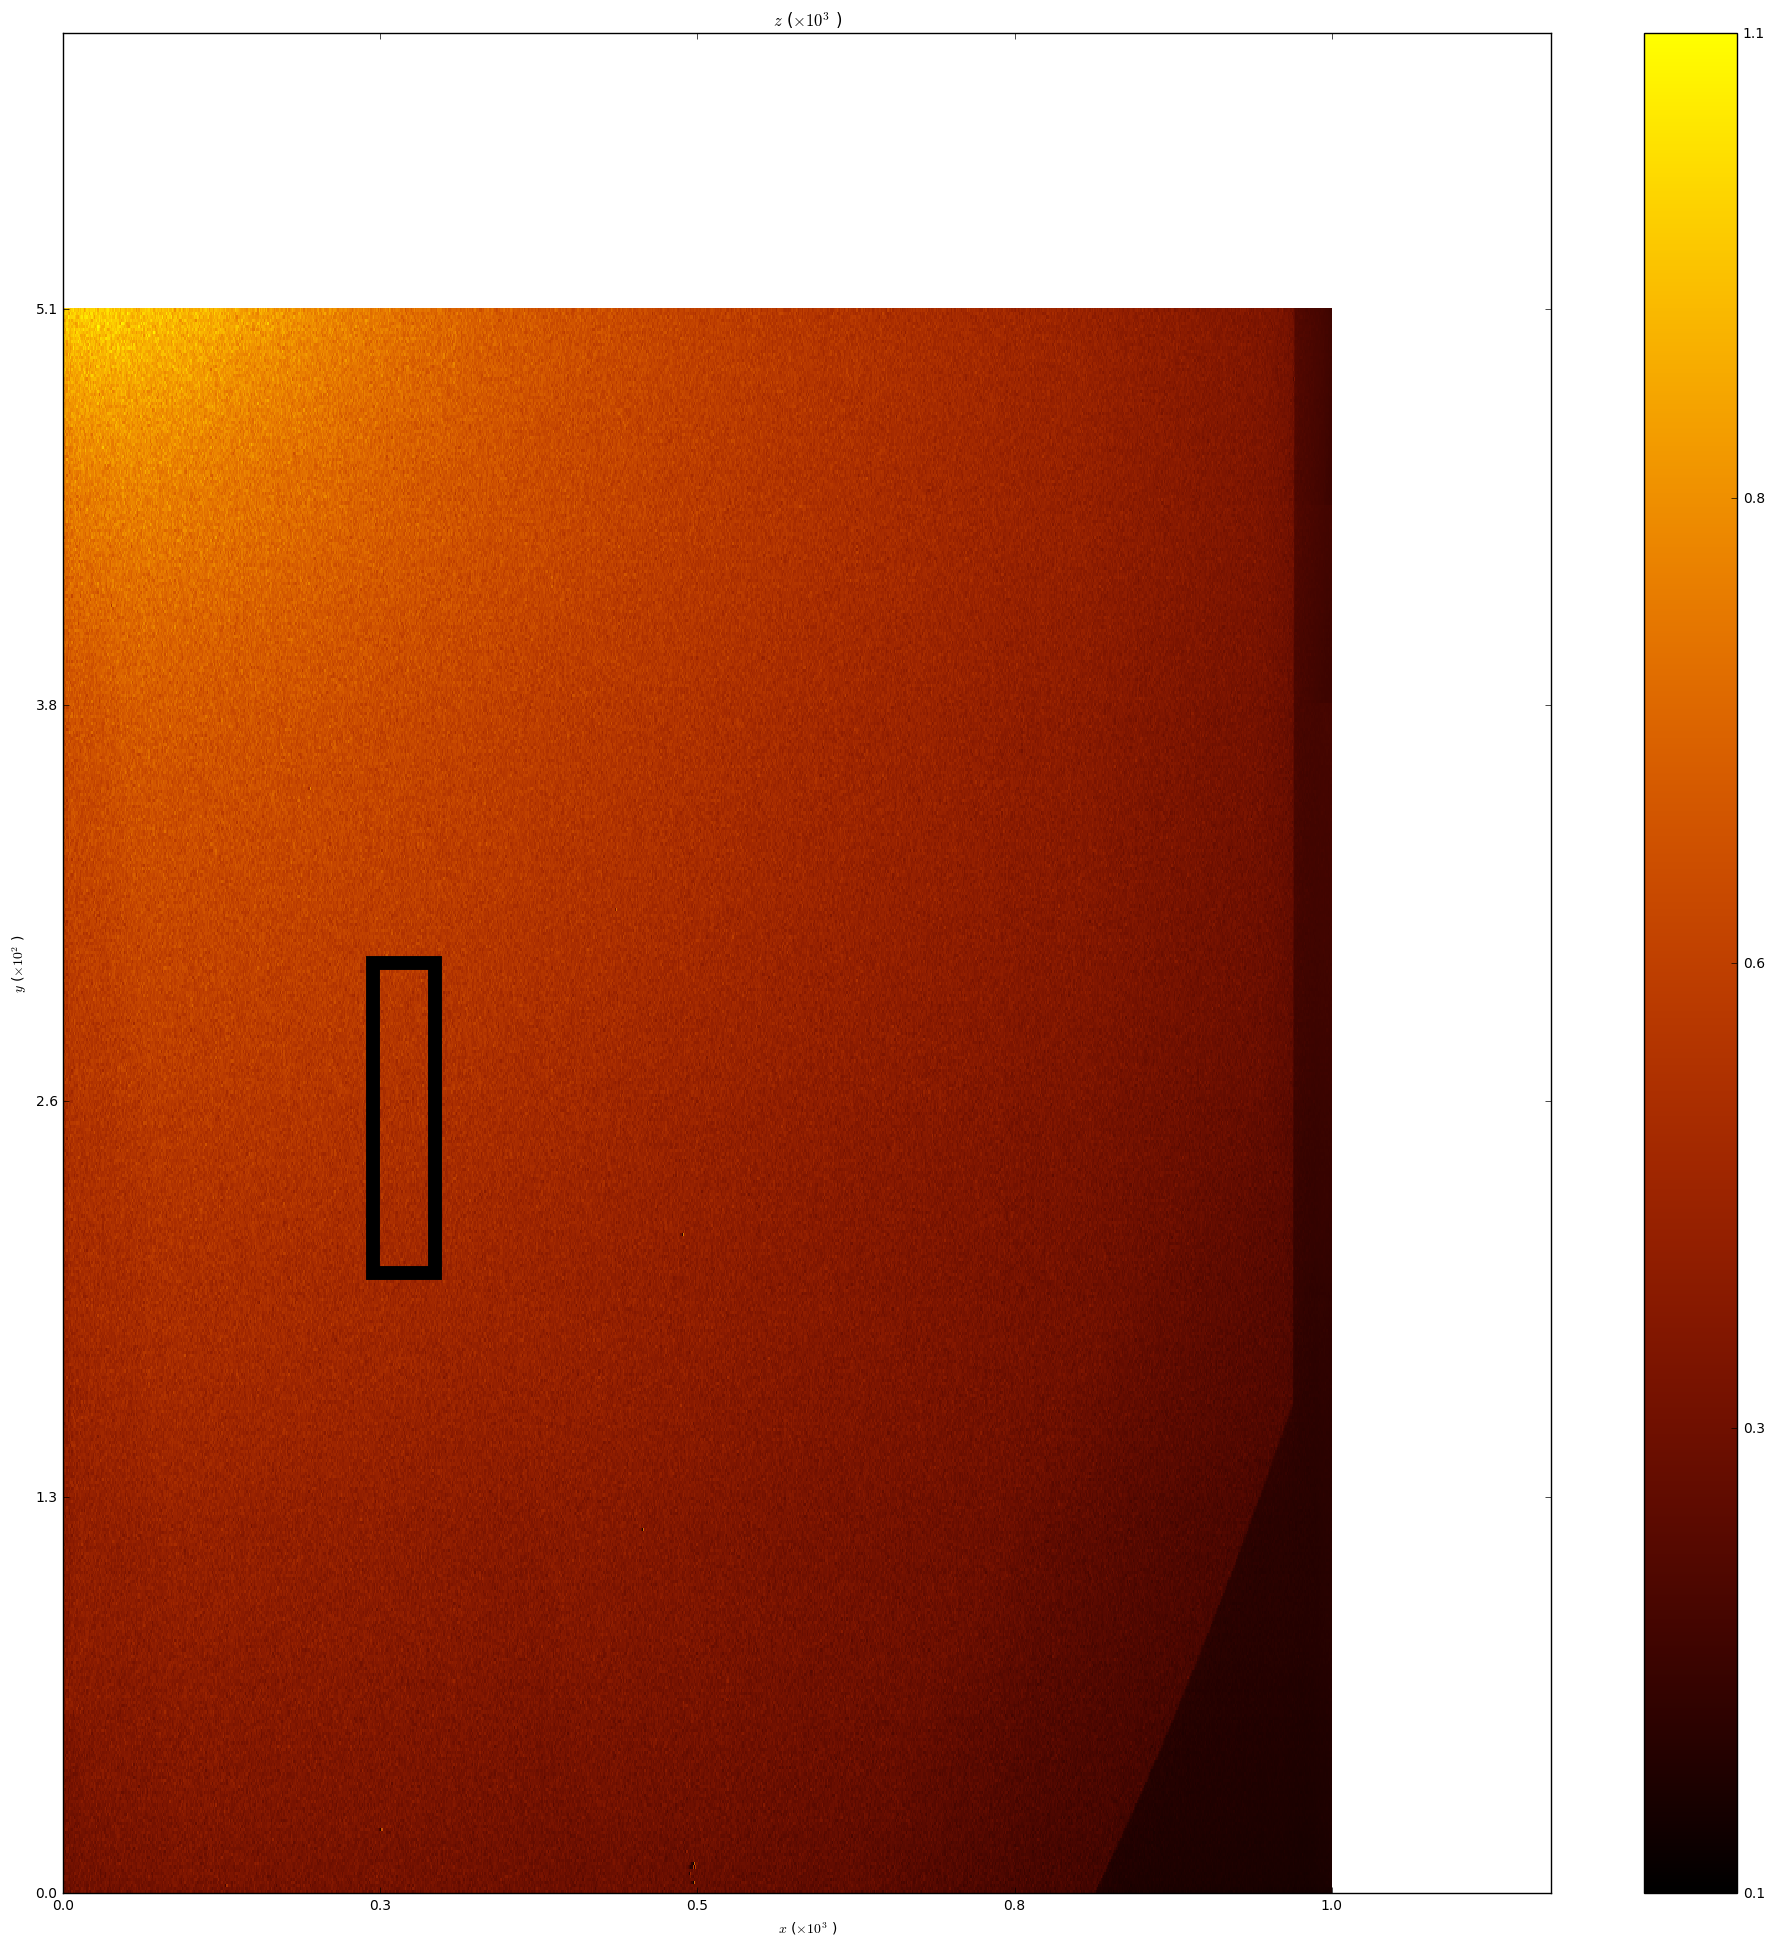

In [8]:
colorPlot( x , y , iMs[:,:,0].T, xIn=24, yIn=24 )

X1 = 250
X2 = 300
Y1 = 200
Y2 = 300

DX = X2-X1
DY = Y2-Y1

import matplotlib.patches as patch

p=patch.Rectangle( (X1,Y1) , width = DX , height= DY , fill=False , linewidth = 10)
ax = plt.gca()
ax.add_patch(p)



In [9]:
detector_stage_direction_in_degree = [ 0 , 0 , 0 ,0 ,0,0,0,0]
detector_stage_shift_weight = [ 0 , 0 , 0 ,0,0,0,0,0]
manipulator_position_in_micro_meter = [ 0 , 0 , 0 ,0,0,0,0,0]
detector_coordinate_in_micro_meter = [ (-1599.23,51678.8) , (-1655.65,25016) , (799.187,-1735.1) , (782.785,-28498.8) , (-792.005,28477.5) , (-838.52,1818.2) , (1650.0,-24900.0) , (1618.37,-51643.8)]
detector_rotation_angle_in_degree = [ 269.925 , 269.966 , 269.969 , 269.855 , 90.0468 , 89.965 , 90.0 , 90.018]


def generate_tile_coords():
        x_all = np.zeros((512,1024,8))
        y_all = np.zeros((512,1024,8))
        tilesize = (512,1024)

        for idx in range(8):
            origin = detector_coordinate_in_micro_meter[idx]
            thetad  = detector_rotation_angle_in_degree[idx]

            x , y = single_tile_coords( tilesize , origin , thetad )


            theta_shift = detector_stage_direction_in_degree[idx] * np.pi/180.
            shiftweight = detector_stage_shift_weight[idx]
            manip = manipulator_position_in_micro_meter[idx]

            x = x + np.cos(theta_shift) * shiftweight * manip
            y = y + np.sin(theta_shift) * shiftweight * manip

            x_all[:,:,idx] = x
            y_all[:,:,idx] = y

        return x_all, y_all



def single_tile_coords( tilesize , origin , theta ):
        '''
                Takes data in tile and places first number at origin and assigns coordinats to pixels.
                Theta is rotation from origin being in upper left

                Theta should be specified in degrees. Origin in micron.
        '''
        xp = np.arange( tilesize[0] )
        yp = np.arange( tilesize[1] )

        x_micron = xp*50.
        y_micron = yp*50.

        theta_rad = theta*np.pi/180.
        R = np.mat([[np.cos(theta_rad) , np.sin(theta_rad)] , [-np.sin(theta_rad) , np.cos(theta_rad)]])

        x = np.zeros( tilesize )
        y = np.zeros( tilesize )

        for ix, x0 in enumerate(x_micron):
                for iy, y0 in enumerate(y_micron):
                        v = R*np.array( [[x0],[y0]] )
                        x[ix,iy] = v[0]
                        y[ix,iy] = v[1] 
        return x+origin[0], y+origin[1]


In [10]:
x, y= generate_tile_coords()

None None
70.7857977295 1106.8828302
70.7857977295 1106.8828302
70.7857977295 1106.8828302
70.7857977295 1106.8828302
70.7857977295 1106.8828302
70.7857977295 1106.8828302
70.7857977295 1106.8828302


/home/mrware/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['serif'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


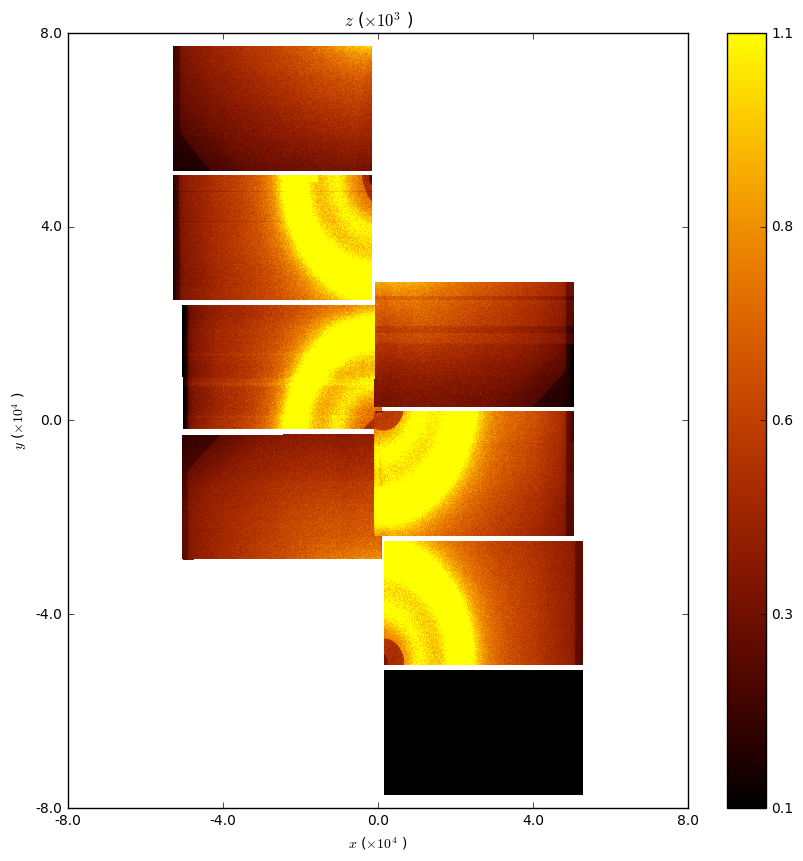

In [11]:
idx=0

xyMax = 8e4 

figOpts = {'xLims':[-xyMax,xyMax],'yLims':[-xyMax,xyMax],'xIn':10, 'yIn':10}

colorPlot( x[:,:,idx] , y[:,:,idx] , iMs[:,:,idx].T,**figOpts  )

for idx in range(1,8):
    colorPlot( x[:,:,idx] , y[:,:,idx] , iMs[:,:,idx].T, newFigure = False,**figOpts )
    